In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('XYZCorp_LendingData.txt',sep='\t',low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [5]:
df['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [6]:
df.shape

(855969, 73)

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [8]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [9]:
# Drop Columns where null values are more than half of the data
new_df = df.dropna(axis=1, thresh=int(len(df)/2))

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 52 columns):
id                            855969 non-null int64
member_id                     855969 non-null int64
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
sub_grade                     855969 non-null object
emp_title                     806526 non-null object
emp_length                    812908 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null object
pymnt_plan                    855969 

In [11]:
new_df.shape

(855969, 52)

In [12]:
new_df.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

In [13]:
new_df['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [14]:
#number of unique values
new_df['issue_d'].nunique()

103

In [15]:
new_df['issue_d']=pd.to_datetime(new_df['issue_d'])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
new_df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [17]:
new_df['issue_year'] = pd.to_datetime(new_df['issue_d']).dt.to_period('Y')

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
new_df['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: period[A-DEC]

In [19]:
new_df['year'] = new_df.issue_d.dt.year

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
new_df['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [21]:
new_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,issue_year,year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,2011,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,2011
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,2011


In [22]:
new_df['annual_inc']

0          24000.00
1          30000.00
2          12252.00
3          49200.00
4          80000.00
5          36000.00
6          47004.00
7          48000.00
8          40000.00
9          15000.00
10         72000.00
11         75000.00
12         30000.00
13         15000.00
14        100000.00
15         28000.00
16         42000.00
17        110000.00
18         84000.00
19         77385.19
20         43370.00
21        105000.00
22         50000.00
23         50000.00
24         76000.00
25         92000.00
26         60000.00
27         50004.00
28        106000.00
29         25000.00
            ...    
855939     72000.00
855940     93600.00
855941     48000.00
855942     70000.00
855943     57000.00
855944     90000.00
855945     54000.00
855946     50000.00
855947     52000.00
855948    103000.00
855949     55000.00
855950     92000.00
855951     65000.00
855952     50000.00
855953     40000.00
855954     54000.00
855955     57000.00
855956     27000.00
855957     75000.00


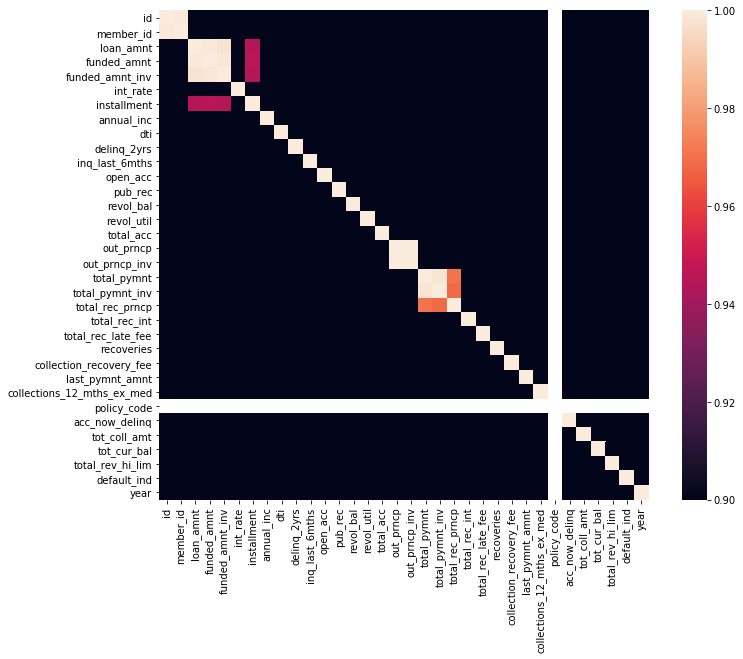

In [23]:
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin=0.9, vmax=1, square=True)

In [24]:
drop_list = ['id', 'member_id', 'title', 'sub_grade', 'zip_code', 'addr_state', 'pub_rec', 'policy_code', 'next_pymnt_d',  
             'emp_title', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
             'last_pymnt_amnt', 'funded_amnt','funded_amnt_inv', 'last_pymnt_d','last_credit_pull_d', 'collections_12_mths_ex_med', 'revol_util']

In [25]:
new_df = new_df.drop(columns=drop_list)

In [26]:
new_df.shape

(855969, 28)

In [27]:
new_df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             43061
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
acc_now_delinq             0
tot_coll_amt           67313
tot_cur_bal            67313
total_rev_hi_lim       67313
default_ind                0
issue_year                 0
year                       0
dtype: int64

In [28]:
new_df["total_rev_hi_lim"].fillna(new_df["total_rev_hi_lim"].median(), inplace= True)
new_df["tot_cur_bal"].fillna(new_df["tot_cur_bal"].median(), inplace= True)
new_df['tot_coll_amt'].fillna(0, inplace=True)
new_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [29]:
new_df['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [30]:
new_df['emp_length'].fillna("< 1 year", inplace=True)
new_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

#### Label Encoding emp_length

In [31]:
new_df['emp_length'].replace("10+ years",10, inplace=True)
new_df['emp_length'].replace("9 years",9, inplace=True)
new_df['emp_length'].replace("8 years",8, inplace=True)
new_df['emp_length'].replace("7 years",7, inplace=True)
new_df['emp_length'].replace("6 years",6, inplace=True)
new_df['emp_length'].replace("5 years",5, inplace=True)
new_df['emp_length'].replace("4 years",4, inplace=True)
new_df['emp_length'].replace("3 years",3, inplace=True)
new_df['emp_length'].replace("2 years",2, inplace=True)
new_df['emp_length'].replace("1 year",1, inplace=True)
new_df['emp_length'].replace("< 1 year",0, inplace=True)
new_df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [32]:
new_df['grade'].replace("A",1, inplace=True)
new_df['grade'].replace("B",2, inplace=True)
new_df['grade'].replace("C",3, inplace=True)
new_df['grade'].replace("D",4, inplace=True)
new_df['grade'].replace("E",5, inplace=True)
new_df['grade'].replace("F",6, inplace=True)
new_df['grade'].replace("G",7, inplace=True)
new_df['grade'].head()

0    2
1    3
2    3
3    3
4    2
Name: grade, dtype: int64

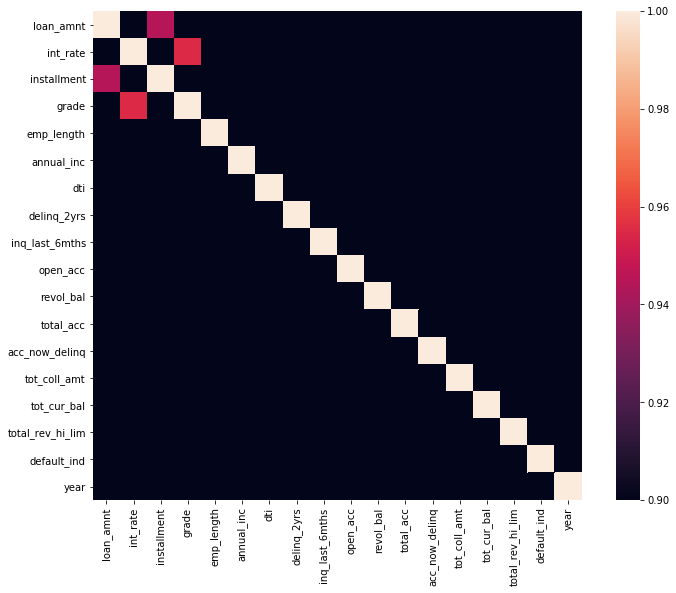

In [33]:
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin=0.9, vmax=1, square=True)

In [34]:
 new_df.drop(columns=['grade', 'installment'], inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 26 columns):
loan_amnt              855969 non-null float64
term                   855969 non-null object
int_rate               855969 non-null float64
emp_length             855969 non-null int64
home_ownership         855969 non-null object
annual_inc             855969 non-null float64
verification_status    855969 non-null object
issue_d                855969 non-null datetime64[ns]
pymnt_plan             855969 non-null object
purpose                855969 non-null object
dti                    855969 non-null float64
delinq_2yrs            855969 non-null float64
earliest_cr_line       855969 non-null object
inq_last_6mths         855969 non-null float64
open_acc               855969 non-null float64
revol_bal              855969 non-null float64
total_acc              855969 non-null float64
initial_list_status    855969 non-null object
application_type       855969 non-null object

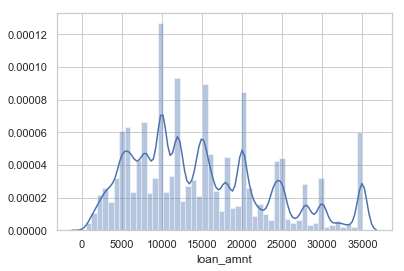

In [35]:
sns.set(style="whitegrid")
sns.distplot(new_df['loan_amnt'])

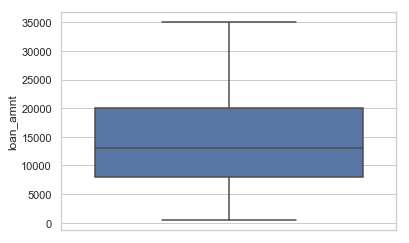

In [36]:
sns.set(style="whitegrid")
sns.boxplot(y='loan_amnt',data=new_df)

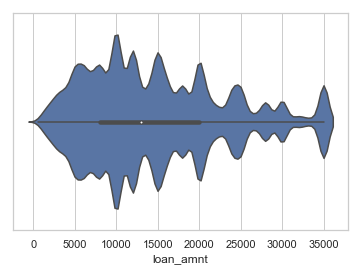

In [37]:
sns.set(style="whitegrid")
sns.violinplot(x='loan_amnt', data=new_df)

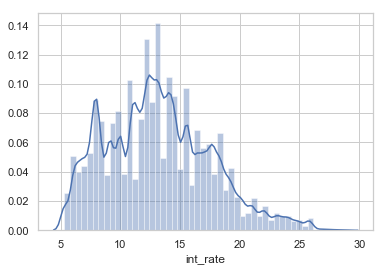

In [38]:
sns.set(style="whitegrid")
sns.distplot(new_df['int_rate'])

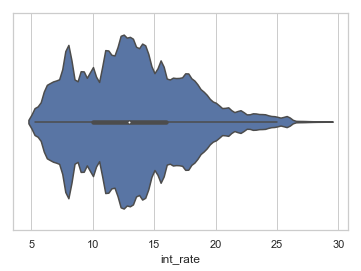

In [39]:
sns.set(style="whitegrid")
sns.violinplot(x='int_rate', data=new_df)

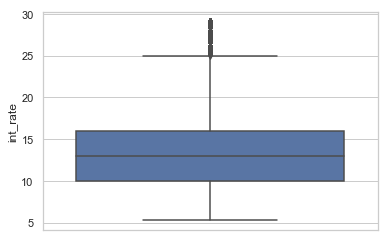

In [40]:
sns.set(style="whitegrid")
sns.boxplot(y='int_rate',data=new_df)

(0, 300000)

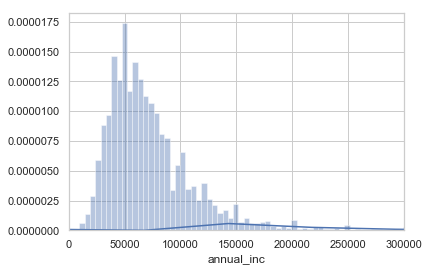

In [41]:
sns.set(style="whitegrid")
ax=sns.distplot(df['annual_inc'],bins=2000)
ax.set_xlim(0,300000)

(0, 300000)

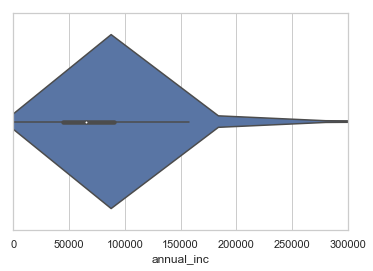

In [42]:
sns.set(style="whitegrid")
ax=sns.violinplot(x ='annual_inc', data=df)
ax.set_xlim(0,300000)

In [43]:
new_df['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

(0, 300000)

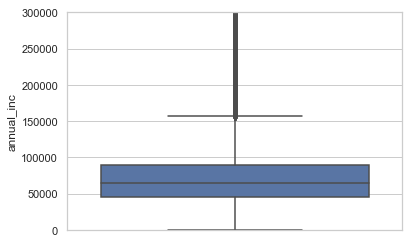

In [44]:
sns.set(style="whitegrid")
ax=sns.boxplot(y='annual_inc',data=df)
ax.set_ylim(0,300000)

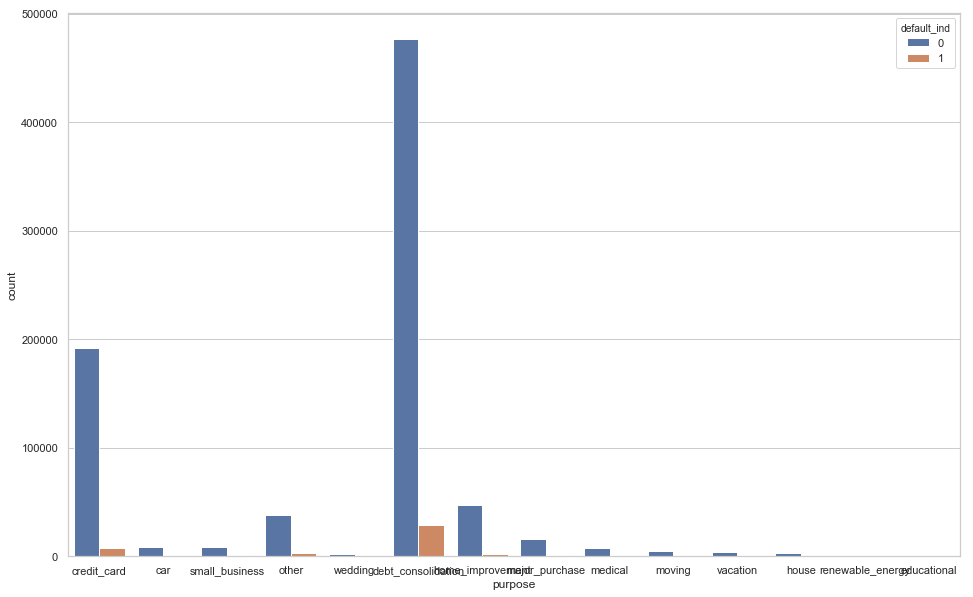

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=new_df,hue='default_ind')
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [46]:
new_df['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: period[A-DEC]

In [47]:
new_df['year'].value_counts()

2015    403697
2014    227865
2013    131678
2012     53035
2011     21636
2010     11529
2009      4716
2008      1562
2007       251
Name: year, dtype: int64

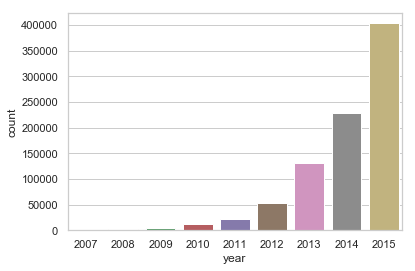

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='year',data=new_df)

In [49]:
new_df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

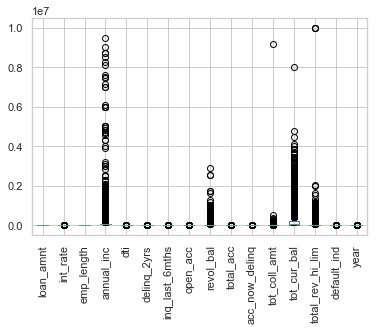

In [50]:
new_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [51]:
new_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [52]:
new_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [53]:

new_df['verification_status'].unique()   # Drop

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [54]:
new_df['pymnt_plan'].unique()   # Drop

array(['n', 'y'], dtype=object)

In [55]:
new_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [56]:
new_df['earliest_cr_line'].unique()  #Drop

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [57]:
new_df['initial_list_status'].unique() #Drop

array(['f', 'w'], dtype=object)

In [58]:
new_df['application_type'].unique() # Drop

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [59]:
new_df.drop(columns=['initial_list_status', 'application_type', 'earliest_cr_line', 'pymnt_plan', 'verification_status'], inplace=True)

In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 21 columns):
loan_amnt           855969 non-null float64
term                855969 non-null object
int_rate            855969 non-null float64
emp_length          855969 non-null int64
home_ownership      855969 non-null object
annual_inc          855969 non-null float64
issue_d             855969 non-null datetime64[ns]
purpose             855969 non-null object
dti                 855969 non-null float64
delinq_2yrs         855969 non-null float64
inq_last_6mths      855969 non-null float64
open_acc            855969 non-null float64
revol_bal           855969 non-null float64
total_acc           855969 non-null float64
acc_now_delinq      855969 non-null float64
tot_coll_amt        855969 non-null float64
tot_cur_bal         855969 non-null float64
total_rev_hi_lim    855969 non-null float64
default_ind         855969 non-null int64
issue_year          855969 non-null period[A-DEC]
yea

In [61]:
dummy_df = pd.get_dummies(new_df[['home_ownership', 'term', 'purpose']], drop_first=True)
new_df.drop(columns=['home_ownership', 'term', 'purpose'], inplace=True)
data = pd.concat([new_df, dummy_df], axis=1)
data.shape

(855969, 37)

In [62]:
data[data['issue_d'] >= '2015-06-01']['issue_d'].unique()

array(['2015-12-01T00:00:00.000000000', '2015-11-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [63]:
data['default_ind'].head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [64]:
data[data['default_ind']==1].shape

(46467, 37)

In [65]:
data[data['default_ind']==0].shape

(809502, 37)

In [66]:
test=data[data['issue_d']>= '2015-06-01']
train=data[data['issue_d']< '2015-06-01']

In [67]:
test.shape

(256991, 37)

In [68]:
train.shape

(598978, 37)

In [69]:
train.head()

,loan_amnt,int_rate,emp_length,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,10.65,10,24000.0,2011-12-01,27.65,0.0,1.0,3.0,13648.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,0,30000.0,2011-12-01,1.00,0.0,5.0,3.0,1687.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,10,12252.0,2011-12-01,8.72,0.0,2.0,2.0,2956.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,10,49200.0,2011-12-01,20.00,0.0,1.0,10.0,5598.0,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,12.69,1,80000.0,2011-12-01,17.94,0.0,0.0,15.0,27783.0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
y_train = train['default_ind']
y_test = test['default_ind']
train.drop(columns=['default_ind'], inplace=True)
test.drop(columns=['default_ind'], inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [71]:
test.shape

(256991, 36)

In [72]:
train.shape

(598978, 36)

In [73]:
test.drop(columns=['issue_d'], inplace=True)
train.drop(columns=['issue_d'], inplace=True)

In [87]:
train.drop(columns=['issue_year'], inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [88]:
test.drop(columns=['issue_year'], inplace=True)

In [76]:
test.shape

(256991, 34)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598978 entries, 0 to 855968
Data columns (total 34 columns):
loan_amnt                     598978 non-null float64
int_rate                      598978 non-null float64
emp_length                    598978 non-null int64
annual_inc                    598978 non-null float64
dti                           598978 non-null float64
delinq_2yrs                   598978 non-null float64
inq_last_6mths                598978 non-null float64
open_acc                      598978 non-null float64
revol_bal                     598978 non-null float64
total_acc                     598978 non-null float64
acc_now_delinq                598978 non-null float64
tot_coll_amt                  598978 non-null float64
tot_cur_bal                   598978 non-null float64
total_rev_hi_lim              598978 non-null float64
year                          598978 non-null int64
home_ownership_MORTGAGE       598978 non-null uint8
home_ownership_NONE           5

In [78]:
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
x_train = standardScalar.fit_transform(train)
x_test = standardScalar.transform(test)
x_train = pd.DataFrame(data=x_train, columns=train.columns)
x_test = pd.DataFrame(data=x_test, columns=test.columns)
x_train.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-1.144446,-0.656815,1.130367,-0.880398,1.240480,-0.358617,0.268642,-1.626437,-0.136592,-1.384809,...,-0.244568,-0.067103,-0.142269,-0.097531,-0.078581,-0.225597,-0.026331,-0.114865,-0.072629,-0.061801
1,-1.444334,0.400162,-1.518735,-0.774693,-2.061572,-0.358617,4.266667,-1.626437,-0.707956,-1.811515,...,-0.244568,-0.067103,-0.142269,-0.097531,-0.078581,-0.225597,-0.026331,-0.114865,-0.072629,-0.061801
2,-1.456329,0.558022,1.130367,-1.087369,-1.105030,-0.358617,1.268148,-1.821052,-0.647337,-1.299467,...,-0.244568,-0.067103,-0.142269,-0.097531,-0.078581,-0.225597,-0.026331,8.705863,-0.072629,-0.061801
3,-0.544672,-0.007072,1.130367,-0.436436,0.292612,-0.358617,0.268642,-0.264131,-0.521131,1.004745,...,-0.244568,-0.067103,-0.142269,-0.097531,-0.078581,4.432687,-0.026331,-0.114865,-0.072629,-0.061801
4,-1.384356,-0.190098,-1.253824,0.106184,0.037369,-0.358617,-0.730864,0.708945,0.538622,1.090086,...,-0.244568,-0.067103,-0.142269,-0.097531,-0.078581,4.432687,-0.026331,-0.114865,-0.072629,-0.061801


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_recall_curve, auc, precision_score, recall_score, roc_auc_score,f1_score

### Logistic Regression Classifer without applying SMOTE

In [80]:
logisticClassifier = LogisticRegression(solver='saga')
logisticClassifier.fit(x_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

In [81]:
y_pred_logistic = logisticClassifier.predict(x_test)
accuracy_score(y_test, y_pred_logistic)

0.9987703849551152

In [82]:
confusion_matrix(y_test, y_pred_logistic)

array([[256675,      5],
       [   311,      0]], dtype=int64)

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in ve

In [84]:
test = data[data['issue_d'] >= '2015-06-01']
train = data[data['issue_d'] < '2015-06-01']
y_train = train['default_ind']
y_test = test['default_ind']
train.drop(columns=['default_ind'], inplace=True)
test.drop(columns=['default_ind'], inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [85]:
# Dropping issue_d
test.drop(columns=['issue_d'], inplace=True)
train.drop(columns=['issue_d'], inplace=True)

In [89]:
x_train_res, y_train_res = smote.fit_resample(train, y_train)
x_test_res, y_test_res = smote.fit_resample(test, y_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [90]:
standardScalar = StandardScaler()
x_train_res = standardScalar.fit_transform(x_train_res)
x_test_res = standardScalar.transform(x_test_res)
x_train_res = pd.DataFrame(data=x_train_res, columns=train.columns)
x_test_res = pd.DataFrame(data=x_test_res, columns=test.columns)

In [91]:
logisticClassifier = LogisticRegression(solver='saga')
logisticClassifier.fit(x_train_res, y_train_res)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

In [92]:
y_pred_logistic = logisticClassifier.predict(x_test_res)
accuracy_score(y_test_res, y_pred_logistic)

0.5692866604332243

In [93]:
confusion_matrix(y_test_res, y_pred_logistic)

array([[242186,  14494],
       [206617,  50063]], dtype=int64)

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
accuracies_lr=cross_val_score(estimator=logisticClassifier,X=x_train_res,y=y_train_res,cv=10,n_jobs=-1)

In [96]:
accuracies_lr.mean()

0.6812703937255831

In [97]:
accuracies_lr.std()

0.11989724383471345

In [98]:
f1_score(y_test_res,y_pred_logistic)

0.3116888776822097

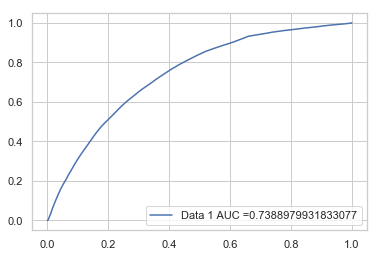

In [99]:
# Putting ROC Curve for Logistic Regression
#Creating ROC curve on y_test and y_pred_proba
y_pred_proba = logisticClassifier.predict_proba(x_test_res)[::,1]
fpr, tpr, _ = roc_curve(y_test_res, y_pred_proba)
#Find Area under the curve
auc = roc_auc_score(y_test_res,y_pred_proba)
#Using plt.plot to plot auc score on the label
plt.plot(fpr,tpr, label = 'Data 1 AUC =' + str(auc))
# print out label on graph and loc value
plt.legend(loc = 4)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
y_score=cross_val_predict(estimator=logisticClassifier,X=x_train_res,y=y_train_res,cv=10,n_jobs=-1, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_res,y_score)

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [ ]:
cols = ['Model', 'ROC Scores', 'Precision Scores', 'Recall Score', 'Accuracy Score','K-Fold Accuracy', 'f1 Score']
models_report = pd.DataFrame(columns=cols)
tmp1 = pd.Series({
    'Model' : 'Simple Logistic Regression',
    'ROC Scores' : roc_auc_score(y_test_res, y_pred_logistic),
    'Precision Scores' : precision_score(y_test_res, y_pred_logistic),
    'Recall Score' : recall_score(y_test_res, y_pred_logistic),
    'Accuracy Score': accuracy_score(y_test_res, y_pred_logistic),
    'K-Fold Accuracy': accuracies_lr.mean(),
    'f1 Score': f1_score(y_test_res,y_pred_logistic),
})
models_report.loc[1] = tmp1

In [ ]:
models_report

In [ ]:
decTreeClassifier = DecisionTreeClassifier(criterion='entropy')

In [ ]:
decTreeClassifier.fit(x_train_res, y_train_res)

In [ ]:
y_pred_decTree = decTreeClassifier.predict(x_test_res)

In [ ]:
accuracy_score(y_test_res, y_pred_decTree)

In [ ]:
confusion_matrix(y_test_res, y_pred_decTree)

In [ ]:
accuracies_lr=cross_val_score(estimator=decTreeClassifier,X=x_train_res,y=y_train_res,cv=10,n_jobs=-1)

In [ ]:
accuracies_lr.mean()

In [ ]:
accuracies_lr.std()

In [ ]:
f1_score(y_test_res,y_pred_decTree)

In [ ]:
# Putting ROC Curve for Decision Tree
#Creating ROC curve on y_test and y_pred_proba
y_pred_proba = decTreeClassifier.predict_proba(x_test_res)[::,1]
fpr, tpr, _ = roc_curve(y_test_res, y_pred_proba)
#Find Area under the curve
auc = roc_auc_score(y_test_res,y_pred_proba)
#Using plt.plot to plot auc score on the label
plt.plot(fpr,tpr, label = 'Data 1 AUC =' + str(auc))
# print out label on graph and loc value
plt.legend(loc = 4)
plt.show()

In [ ]:

tmp2 = pd.Series({
    'Model' : 'Decision Tree Classifier',
    'ROC Scores' : roc_auc_score(y_test_res, y_pred_decTree),
    'Precision Scores' : precision_score(y_test_res, y_pred_decTree),
    'Recall Score' : recall_score(y_test_res, y_pred_decTree),
    'Accuracy Score': accuracy_score(y_test_res, y_pred_decTree),
    'K-Fold Accuracy': accuracies_lr.mean(),
    'f1 Score': f1_score(y_test_res, y_pred_decTree),
})
models_report.loc[2] = tmp2
models_report

In [ ]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(x_train_res, y_train_res)

In [ ]:
y_pred_random_forest = randomForestClassifier.predict(x_test_res)

In [ ]:
accuracy_score(y_test_res, y_pred_random_forest) # Accuracy Score

In [ ]:
confusion_matrix(y_test_res, y_pred_random_forest) # Confusion Matrix

In [ ]:
accuracies_lr=cross_val_score(estimator=randomForestClassifier,X=x_train_res,y=y_train_res,cv=10,n_jobs=-1)